
# Project 04: Movielens Dataset Analysis
**Code Submitted by: Parthib**


In [ ]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
#import datasets:
# Load users dataset
users_df = pd.read_csv('users.dat',sep="::", header=None,names=['UserID','Gender','Age','Occupation','Zip-code'],dtype={'UserID': np.int32, 'Gender': np.str, 'Age': np.int32, 'Occupation' : np.int32, 'Zip-code' : np.str}, engine='python')
#load Ratings dataset
ratings_df = pd.read_csv('ratings.dat',sep="::", header=None,names=['UserID','MovieID','Rating','Timestamp'],dtype={'UserID': np.int32, 'MovieID': np.int32, 'Rating': np.int32, 'Timestamp' : np.str}, engine='python')
#load movies dataset
movie_df = pd.read_csv('movies.dat',sep="::", header=None, names=['MovieID','Title','Genres'],dtype={'MovieID': np.int32, 'Title': np.str, 'Genres': np.str}, engine='python')

# **1. Perform the Exploratory Data Analysis (EDA) for the users dataset**


In [ ]:
#view first 5 records
users_df.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
# view the info()
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
UserID        6040 non-null int32
Gender        6040 non-null object
Age           6040 non-null int32
Occupation    6040 non-null int32
Zip-code      6040 non-null object
dtypes: int32(3), object(2)
memory usage: 165.2+ KB


In [ ]:
#see the shape
users_df.shape

(6040, 5)

In [ ]:
#describe
users_df.describe()

,UserID,Age,Occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [ ]:
#check if any features are null
users_df.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [ ]:
#visulaize user age distribution
age_group = users_df.groupby('Age').size()
age_group

Age
1      222
18    1103
25    2096
35    1193
45     550
50     496
56     380
dtype: int64

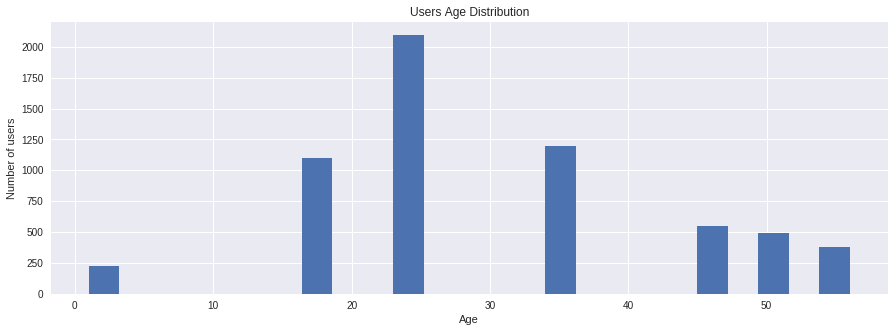

In [ ]:
#plot the histogram (histrogram is good for visualizing distribution)
plt.figure(figsize=(15,5))
plt.hist(data=age_group,x=users_df.Age,bins=25)
plt.title('Users Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of users')
plt.show()

## ***Finding: Most of the users 25 years of age***

# **2. visualize overall ratings by users**

In [ ]:
# view first 5 records of ratings dataset
ratings_df.head()


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
#view the info
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
UserID       1000209 non-null int32
MovieID      1000209 non-null int32
Rating       1000209 non-null int32
Timestamp    1000209 non-null object
dtypes: int32(3), object(1)
memory usage: 19.1+ MB


In [ ]:
#describe
ratings_df.describe()

,UserID,MovieID,Rating
count,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00
std,1.728413e+03,1.096041e+03,1.117102e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.506000e+03,1.030000e+03,3.000000e+00
50%,3.070000e+03,1.835000e+03,4.000000e+00
75%,4.476000e+03,2.770000e+03,4.000000e+00
max,6.040000e+03,3.952000e+03,5.000000e+00


In [ ]:
#check if any null values
ratings_df.isnull().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

In [ ]:
#visualize overall ratings by users
user_ratings = ratings_df.groupby('UserID').size()
user_ratings

UserID
1        53
2       129
3        51
4        21
5       198
6        71
7        31
8       139
9       106
10      401
11      137
12       23
13      108
14       25
15      201
16       35
17      211
18      305
19      255
20       24
21       22
22      297
23      304
24      136
25       85
26      400
27       70
28      107
29      108
30       43
       ... 
6011    197
6012     23
6013    124
6014    106
6015     57
6016    909
6017     33
6018    159
6019     89
6020     43
6021    132
6022     48
6023    147
6024     95
6025    271
6026     81
6027     36
6028     47
6029     31
6030    115
6031     51
6032    104
6033     60
6034     21
6035    280
6036    888
6037    202
6038     20
6039    123
6040    341
Length: 6040, dtype: int64

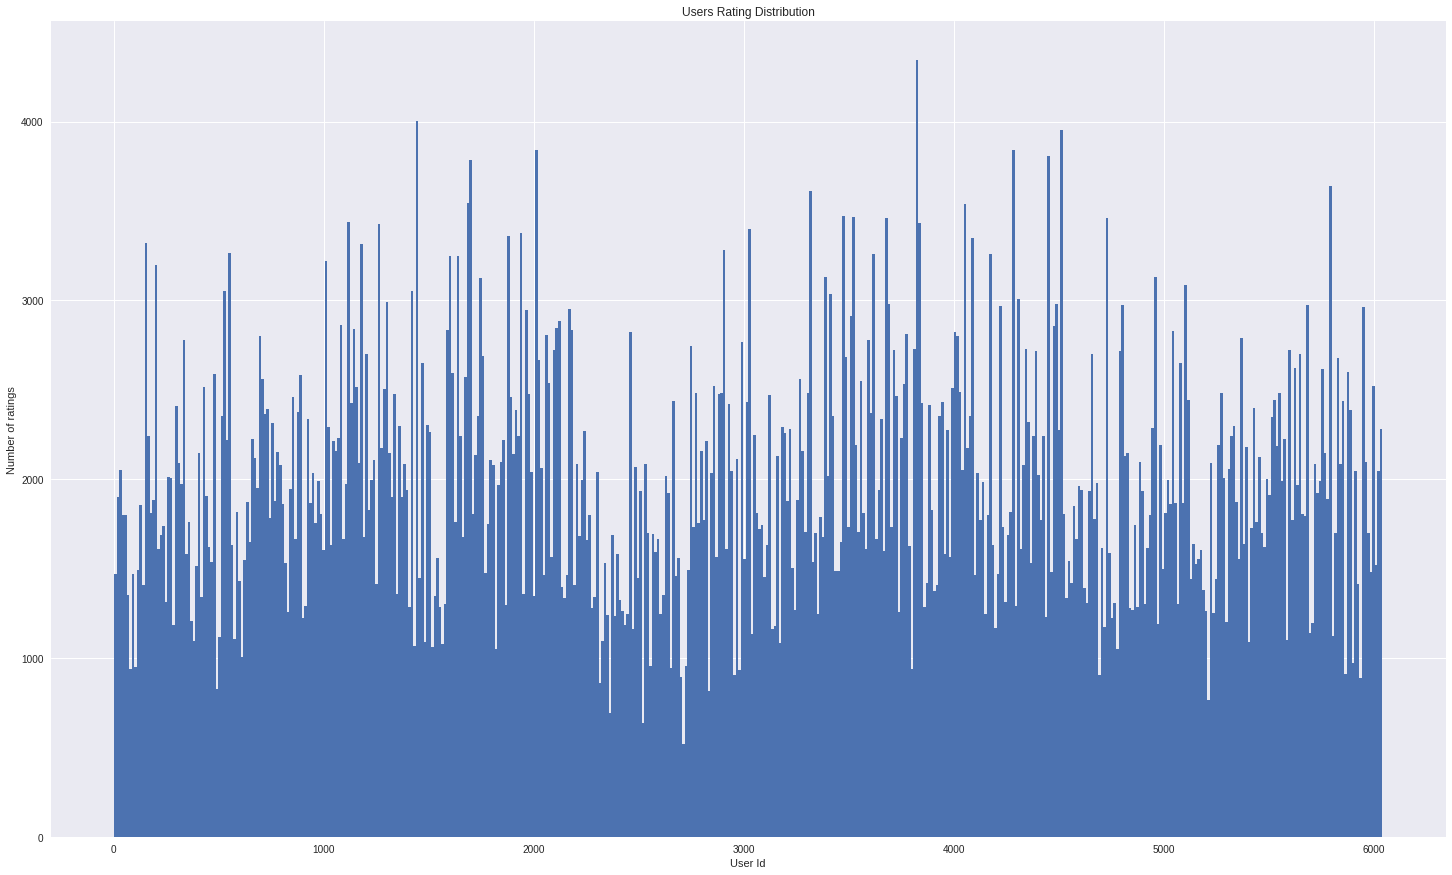

In [ ]:
#plot the histogram (histrogram is good for visulaizing distribution)
plt.figure(figsize=(25,15))
plt.hist(data=user_ratings,x=ratings_df.UserID,bins=500)
plt.title('Users Rating Distribution')
plt.xlabel('User Id')
plt.ylabel('Number of ratings')
plt.show()

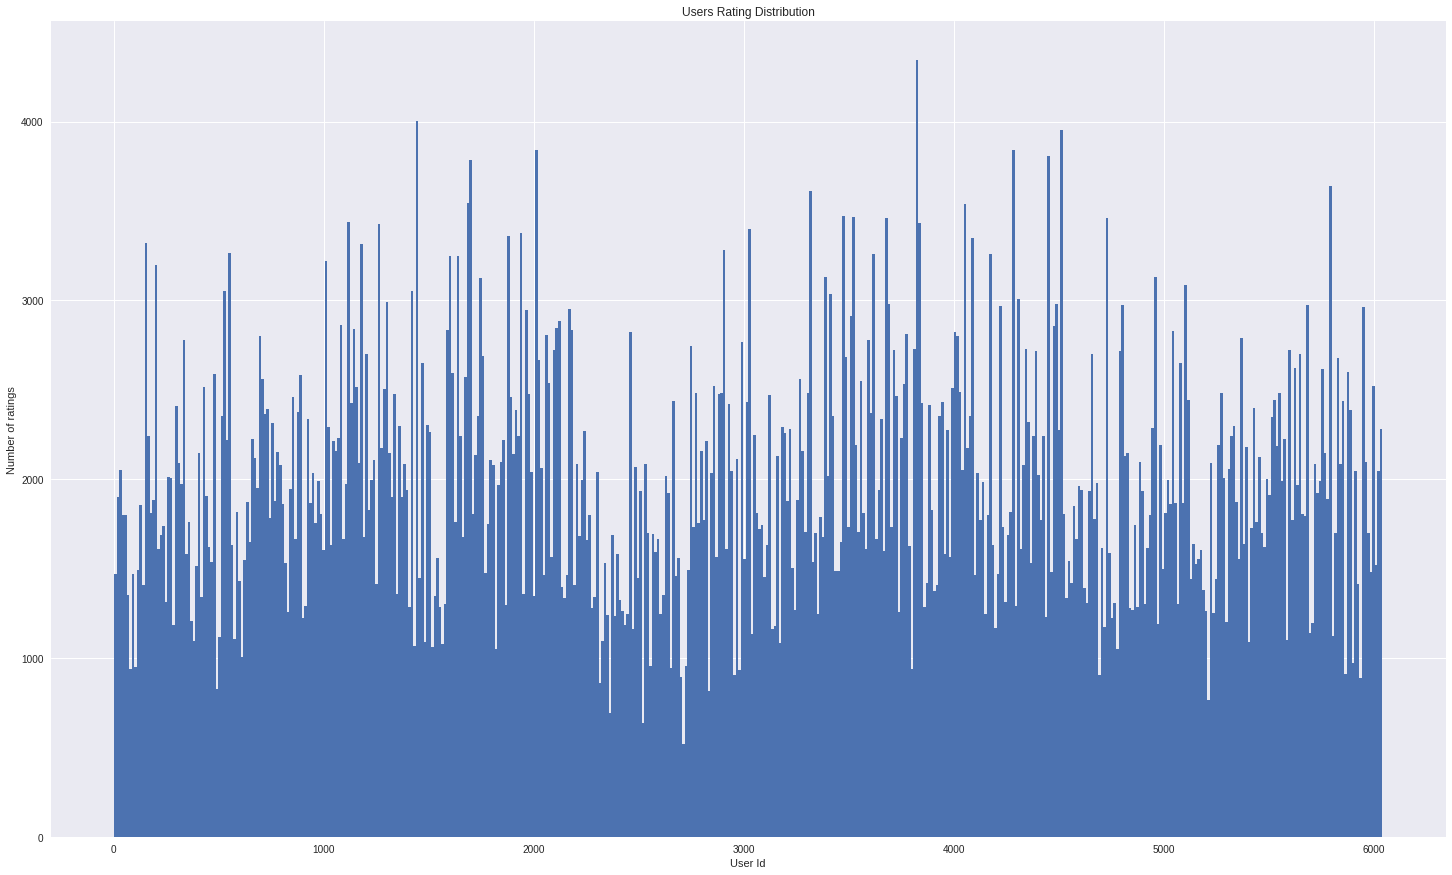

In [ ]:
#plot the histogram (histrogram is good for visulaizing distribution)
plt.figure(figsize=(25,15))
plt.hist(x=ratings_df.UserID,bins=500)
plt.title('Users Rating Distribution')
plt.xlabel('User Id')
plt.ylabel('Number of ratings')
plt.show()

# **3. Find and visualize the user rating of the movie “Toy Story”**


In [ ]:
#Find and visualize the user rating of the movie “Toy Story”
#view first 5 records of movie dataset
movie_df.head()
#get movie id for Toy Story
#Toystory_MovieId = movie_df[movie_df['Title']=='Toy Story (1995)']
#print(Toystory_MovieId.MovieID)

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
#search and filter toy story movie id in rating data
toystory_data = ratings_df[ratings_df.MovieID==1]
toystory_data.head(20)

,UserID,MovieID,Rating,Timestamp
40,1,1,5,978824268
469,6,1,4,978237008
581,8,1,4,978233496
711,9,1,5,978225952
837,10,1,5,978226474
1966,18,1,4,978154768
2276,19,1,5,978555994
2530,21,1,3,978139347
2870,23,1,4,978463614
3405,26,1,3,978130703


In [ ]:
#describe
toystory_data.describe()

,UserID,MovieID,Rating
count,2077.000000,2077.0,2077.000000
mean,3053.819933,1.0,4.146846
std,1750.606746,0.0,0.852349
min,1.000000,1.0,1.000000
25%,1532.000000,1.0,4.000000
50%,3146.000000,1.0,4.000000
75%,4571.000000,1.0,5.000000
max,6040.000000,1.0,5.000000


In [ ]:
toystory_data.groupby('Rating').size()

Rating
1     16
2     61
3    345
4    835
5    820
dtype: int64

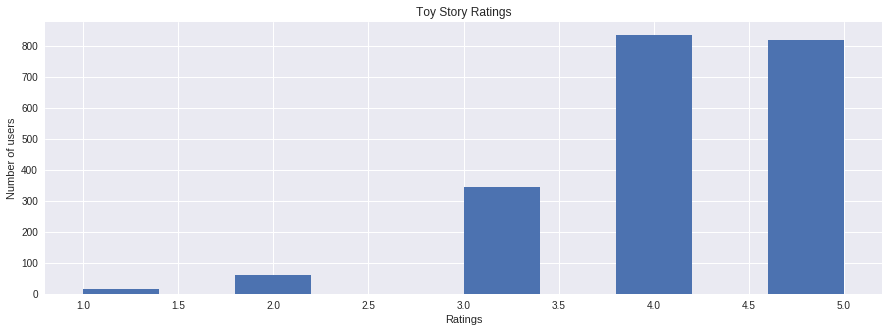

In [ ]:
#plot Toy Story ratings
plt.figure(figsize=(15,5))
plt.hist(x=toystory_data['Rating'])
plt.title('Toy Story Ratings')
plt.xlabel('Ratings')
plt.ylabel('Number of users')
plt.show()

## ***Finding: Toy Story got 4.0 ratings most followed by 5.0***

# **4. Find and visualize the viewership of the movie “Toy Story” by age group**


In [ ]:
#Viewership by age for Toy Story

In [ ]:
viewership = pd.merge(ratings_df, users_df, how='left', left_on=['UserID'], right_on=['UserID'])

In [ ]:
#viewership shape
viewership.shape

(1000209, 8)

In [ ]:
ratings_df.shape

(1000209, 4)

In [ ]:
viewership.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067


In [ ]:
#Select Toy Story data
viewership_of_toy_story = viewership[viewership['MovieID'] == 1]
viewership_of_toy_story.shape

(2077, 8)

In [ ]:
# view first 5 records
viewership_of_toy_story.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
40,1,1,5,978824268,F,1,10,48067
469,6,1,4,978237008,F,50,9,55117
581,8,1,4,978233496,M,25,12,11413
711,9,1,5,978225952,M,25,17,61614
837,10,1,5,978226474,F,35,1,95370


In [ ]:
# group on age
viewership_of_toy_story.groupby('Age').size()

Age
1     112
18    448
25    790
35    423
45    143
50    108
56     53
dtype: int64

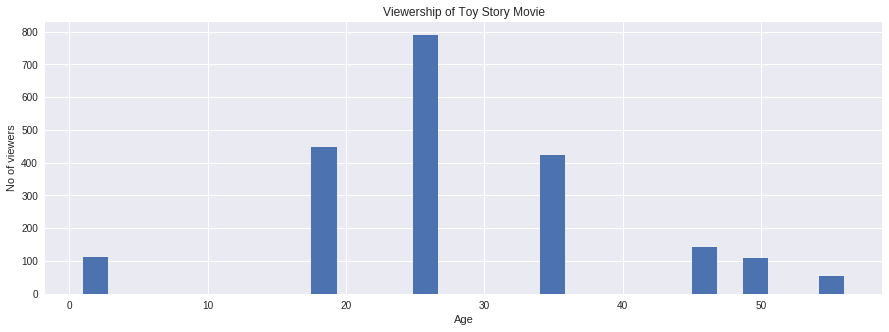

In [ ]:
#plot the graph
plt.figure(figsize=(15,5))
plt.hist(x=viewership_of_toy_story['Age'], data=viewership_of_toy_story, bins=30)
plt.xlabel("Age")
plt.ylabel("No of viewers")
plt.title("Viewership of Toy Story Movie")
plt.show()

## ***Finding: Toy Story is most popular and watched by age group 25***

# **5. Find and visualize the top 25 movies by viewership rating**


In [ ]:
#Top 25 movies by rating
movie_rating = ratings_df.groupby(['MovieID'], as_index=False)
movie_rating.head()
average_movie_ratings = movie_rating.agg({'Rating':'mean'})
average_movie_ratings.head()
top_25_movies = average_movie_ratings.sort_values('Rating', ascending=False).head(25)
top_25_movies

,MovieID,Rating
926,989,5.000000
3635,3881,5.000000
1652,1830,5.000000
3152,3382,5.000000
744,787,5.000000
3054,3280,5.000000
3367,3607,5.000000
3010,3233,5.000000
2955,3172,5.000000
3414,3656,5.000000


In [ ]:
#top 25 movies by viewership data
viewership_top25 = pd.merge(top_25_movies, movie_df, how='left', left_on=['MovieID'], right_on=['MovieID'])
viewership_top25

,MovieID,Rating,Title,Genres
0,989,5.000000,Schlafes Bruder (Brother of Sleep) (1995),Drama
1,3881,5.000000,Bittersweet Motel (2000),Documentary
2,1830,5.000000,Follow the Bitch (1998),Comedy
3,3382,5.000000,Song of Freedom (1936),Drama
4,787,5.000000,"Gate of Heavenly Peace, The (1995)",Documentary
5,3280,5.000000,"Baby, The (1973)",Horror
6,3607,5.000000,One Little Indian (1973),Comedy|Drama|Western
7,3233,5.000000,Smashing Time (1967),Comedy
8,3172,5.000000,Ulysses (Ulisse) (1954),Adventure
9,3656,5.000000,Lured (1947),Crime


# **6. Find the rating for a particular user of user id = 2696**


In [ ]:
#Rating of user id 2696
user_rating_data = ratings_df[ratings_df['UserID']==2696]
user_rating_data.head()

,UserID,MovieID,Rating,Timestamp
440667,2696,1258,4,973308710
440668,2696,1270,2,973308676
440669,2696,1617,4,973308842
440670,2696,1625,4,973308842
440671,2696,1644,2,973308920


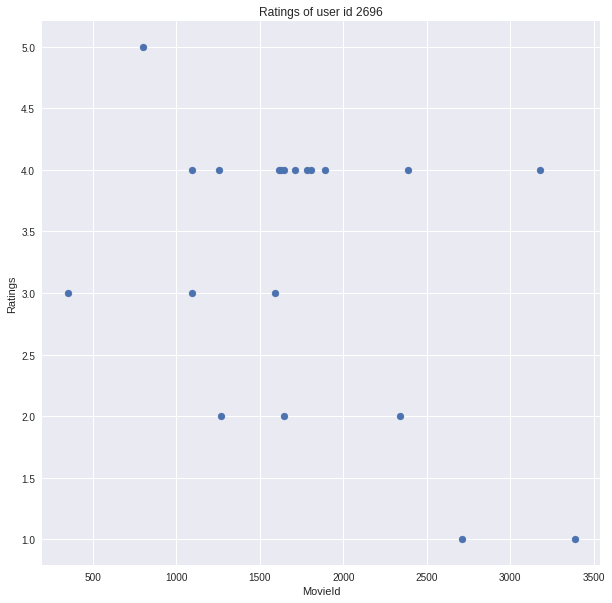

In [ ]:

# plott the scatter graph
plt.figure(figsize=(10,10))
plt.scatter(x=user_rating_data['MovieID'], y=user_rating_data['Rating'])
plt.title('Ratings of user id 2696')
plt.xlabel('MovieId')
plt.ylabel('Ratings')
plt.show()

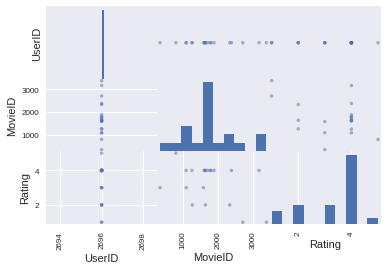

<Figure size 1080x1080 with 0 Axes>

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(user_rating_data)
plt.figure(figsize=(15,15))
plt.show()

# **Perform machine learning on first 500 extracted records**


In [ ]:
#get first 500 records from viewership dataset
viewership500 = viewership.head(500)
viewership500.shape

(500, 8)

In [ ]:
viewership500.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067


In [ ]:

# preprocess data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(viewership500['Age'])
x_age = le.transform(viewership500['Age'])
x_age

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
le.fit(viewership500['Occupation'])
x_occ = le.transform(viewership500['Occupation'])
x_occ

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [ ]:
le.fit(viewership500['MovieID'])
x_movieid = le.transform(viewership500['MovieID'])
x_movieid

array([130,  78,  95, 374, 280, 132, 156, 321,  71,  96,  72,  98, 287,
       330, 107, 318, 304, 251, 355, 319, 274,  80, 154,  61, 278,  12,
       119, 211, 186,  84, 271, 364, 189,  67, 231,  86, 226, 103, 316,
        18,   0, 243, 244, 305,  29, 104, 105, 135, 252,  62, 359,  74,
       145, 161, 346, 184,  75, 264,  76, 266, 302, 121, 329, 379, 136,
       222, 205, 137, 392, 326, 342, 139, 355,  49, 260, 356, 357, 343,
       148, 194,  33, 265, 347,  92,  44, 149, 360, 185, 158, 127, 366,
       367, 368,  17, 267, 293, 225, 380,  68, 207, 398, 323, 237, 100,
       227, 324, 140, 252,  60,  50, 272,  30, 170, 113, 403,  54, 173,
       255, 151, 162, 130, 224, 163, 279, 372, 289,  69, 131, 187,  83,
       133,  70, 281,  15, 308, 297, 234, 286, 407, 239, 193, 413, 240,
       241,  28, 122, 242,  20,   3,  21, 274, 115,  46, 294,  39,  51,
       118,  97,  52, 181, 376, 166, 378, 353,  85,  56, 312, 247, 244,
       220, 331, 248,  36, 135, 246, 400, 143,  41, 144, 145, 41

In [ ]:
viewership500['New Age'] = x_age
viewership500['New Occupation'] = x_occ
viewership500['New MovieID'] = x_movieid

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [ ]:

# Feature Selection
x_input = viewership500[['New Age','New Occupation','New MovieID']]
y_target = viewership500['Rating']

In [ ]:
x_input.head()

,New Age,New Occupation,New MovieID
0,0,2,130
1,0,2,78
2,0,2,95
3,0,2,374
4,0,2,280


In [ ]:
#view first 5 target data
y_target.head()

0    5
1    3
2    3
3    4
4    5
Name: Rating, dtype: int32

In [ ]:
# Split-out validation dataset
x_train, x_test, y_train, y_test = train_test_split(x_input, y_target, test_size=0.25)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((375, 3), (125, 3), (375,), (125,))

In [ ]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
LRModel = logReg.fit(x_train,y_train)

In [ ]:
result = LRModel.predict(x_test)
result

array([4, 3, 3, 3, 3, 4, 4, 3, 4, 4, 4, 4, 4, 3, 3, 4, 3, 4, 4, 4, 4, 3,
       3, 4, 3, 4, 3, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 3, 4,
       4, 3, 4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 3, 3, 4,
       4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 3,
       4, 4, 3, 3, 4, 3, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3, 3, 3, 4, 3,
       3, 4, 3, 3, 3, 3, 4, 3, 4, 4, 4, 4, 4, 4, 3], dtype=int32)

In [ ]:
# print metrics
print (accuracy_score(y_test, result))
print (confusion_matrix(y_test, result))
print (classification_report(y_test, result))

0.376
[[ 0  0  4  1  0]
 [ 0  0  6  8  0]
 [ 0  0 14 16  0]
 [ 0  0 13 33  0]
 [ 0  0  8 22  0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        14
           3       0.31      0.47      0.37        30
           4       0.41      0.72      0.52        46
           5       0.00      0.00      0.00        30

   micro avg       0.38      0.38      0.38       125
   macro avg       0.14      0.24      0.18       125
weighted avg       0.23      0.38      0.28       125



# ***Finding: Accuracy score is 37%***

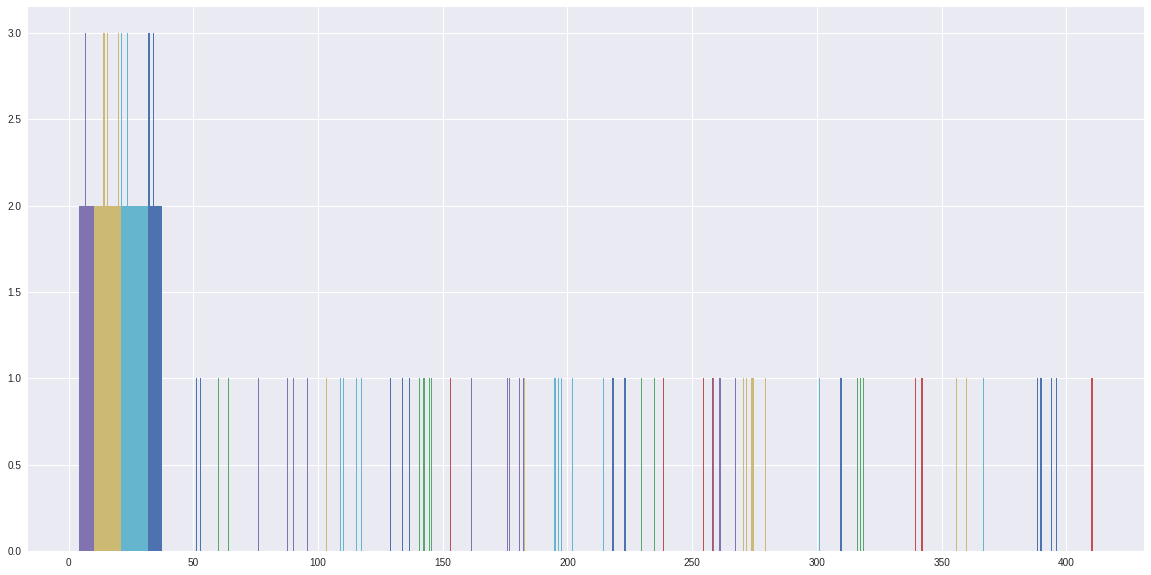

In [ ]:

# Plot the histogram
plt.figure(figsize=(20,10))
plt.hist(x=x_input)
plt.legend()
plt.show()

In [ ]:
# evaluate cross_val_score
seed=7
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.328165 (0.041068)
LDA: 0.325462 (0.051030)
KNN: 0.290967 (0.057693)
CART: 0.239616 (0.072526)
NB: 0.309175 (0.034807)
SVM: 0.300853 (0.090687)


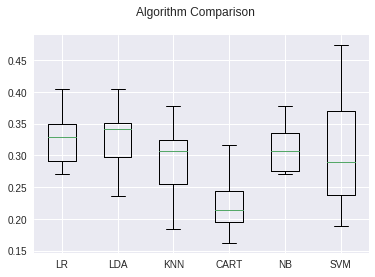

In [ ]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()